# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
%%capture
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")
bitcoin_articles["articles"][-3]

{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters Staff',
 'title': 'Bitcoin slumps more than 5% in volatile trade - Reuters UK',
 'description': 'Bitcoin fell 5.6% against the dollar on Tuesday, after hitting a record high earlier in the day.',
 'url': 'https://www.reuters.com/article/uk-crypto-currency-idUKKBN28B4Y9',
 'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201201&t=2&i=1543049120&r=LYNXMPEGB02PV&w=800',
 'publishedAt': '2020-12-01T12:53:00Z',
 'content': 'By Reuters Staff\r\nFILE PHOTO: Representations of virtual currency Bitcoin are placed on U.S. Dollar banknotes in this illustration taken May 26, 2020. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters… [+463 chars]'}

In [5]:
bitcoin_articles["totalResults"]
#bitcoin_articles["articles"][1]['content']

4699

In [6]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en", sort_by="relevancy")
ethereum_articles["articles"][-3:-1]

[{'source': {'id': None, 'name': 'Slashdot.org'},
  'author': 'BeauHD',
  'title': 'PayPal Now Lets All US Users Buy, Sell and Hold Cryptocurrency',
  'description': "It was teased last month, and now it's official: PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. Engadget reports: PayPal says all eligible users can start buying, selling and holding bitcoin, litecoin, ethereum and bitco…",
  'url': 'https://news.slashdot.org/story/20/11/12/2320243/paypal-now-lets-all-us-users-buy-sell-and-hold-cryptocurrency',
  'urlToImage': 'https://a.fsdn.com/sd/topics/bitcoin_64.png',
  'publishedAt': '2020-11-13T00:45:00Z',
  'content': "Try reaching for a live customer support person from Paypal. It's virtually impossible to get a hold of 1 thru their automated phone system.\r\nImagine there's a glitch in the cypto transfer and you ne… [+23 chars]"},
 {'source': {'id': None, 'name': 'Boing Boing'},
  'author': 'Mark Frauenfelder',
  'title': 'Beware of buying 

In [7]:
def create_sentiment_df(news):
    sentiment_list=[]
    for article in news["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
        
            sentiment_list.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            
            })
            
        except AttributeError:
            pass
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    sentiment_df = pd.DataFrame(sentiment_list)
    return sentiment_df[cols]
    
        

In [8]:
# Create the Bitcoin sentiment scores DataFrame
df_bitcoin =  create_sentiment_df(bitcoin_articles)
df_bitcoin.head()

,date,text,compound,positive,negative,neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


In [9]:
# Create the Ethereum sentiment scores DataFrame
df_ethereum =  create_sentiment_df(ethereum_articles)
df_ethereum.tail()

,date,text,compound,positive,negative,neutral
15,2020-12-01,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000
16,2020-11-17,Hala Systems is using Hedera Hashgraph a secur...,-0.3400,0.132,0.196,0.672
17,2020-11-13,Try reaching for a live customer support perso...,0.5423,0.127,0.000,0.873
18,2020-11-12,Paypal now lets you buy and sell cryptocurrenc...,0.5994,0.123,0.000,0.877
19,2020-11-27,A chain of block erupters used for Bitcoin min...,-0.1280,0.070,0.085,0.845


In [11]:
# Describe the Bitcoin Sentiment
df_bitcoin.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.113005,0.055895,0.025737,0.918368
std,0.374252,0.066608,0.066192,0.100555
min,-0.670500,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.000000,0.050000,0.000000,0.950000
75%,0.308150,0.093000,0.000000,1.000000
max,0.765000,0.174000,0.215000,1.000000


In [12]:
# Describe the Ethereum Sentiment
df_ethereum.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.122565,0.060950,0.021050,0.918000
std,0.320198,0.078682,0.054473,0.105304
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.876000
50%,0.000000,0.052000,0.000000,0.948000
75%,0.261275,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [ ]:
#The Ethereum has a higher positive score, and a higher compound score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary
sw_original = set(stopwords.words('english'))
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}
sw_complete=sw_original.union(sw_addons)
print(sw_complete)

{'their', 'd', 'hers', 'this', 'before', 'were', 'again', 'wasn', 'haven', "you've", 't', 'it', "doesn't", 'did', 'that', 'll', 'didn', "hasn't", 'theirs', 'then', 'by', 'its', 'own', 'nor', 've', 'mightn', 'ourselves', 'doing', 'on', 'hadn', 'shan', 'until', 'where', 'itself', 'hasn', 'couldn', 'her', 'y', 'announced', "should've", "you'd", 'o', "haven't", 're', 'off', "needn't", 'ain', 'but', "hadn't", 'my', "won't", 'are', 'yourself', 'is', "you'll", 'such', 'i', 'against', "wasn't", 'out', 'there', 'those', 'if', 'weren', 's', 'most', 'am', 'or', 'when', 'isn', 'do', 'was', 'yours', 'they', 'below', 'yourselves', 'he', 'with', 'up', 'at', 'some', 'between', 'these', 'me', 'been', 'herself', 'all', 'you', 'myself', "you're", 'through', 'each', 'mustn', 'including', 'the', 'about', 'into', 'few', 'while', "isn't", 'of', 'shouldn', 'under', 'an', "shouldn't", 'above', 'to', 'down', "couldn't", 'how', 'aren', 'being', 'needn', 'him', 'too', 'same', "wouldn't", "don't", 'today', 'a', 'b

In [15]:
#Initiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [16]:
# Complete the tokenizer function
def tokenizer(text):
    # Create a list of the words and remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)   
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lemmatize_words = [lemmatizer.lemmatize(iterator) for iterator in words]
    
    # Convert the words to lowercase and Remove the stop words
    output = [iterator.lower() for iterator in lemmatize_words if iterator.lower() not in sw_complete]
    return output
        

In [17]:
# Create a new tokens column for Bitcoin
df_bitcoin["tokens"]= blockchain_df['text'].apply(tokenizer)
df_bitcoin.tail(10)

,date,text,compound,positive,negative,neutral,tokens
9,2020-11-17,"Maisie Williams also known as Arya Stark, daug...",0.0000,0.000,0.000,1.000,"[maisie, williams, known, arya, stark, daughte..."
10,2020-11-10,1 with 1 posters participating\r\nA former Mic...,-0.6705,0.069,0.215,0.716,"[poster, participatinga, former, microsoft, so..."
11,2020-11-18,8 with 7 posters participating\r\nBitcoin rose...,0.6249,0.174,0.000,0.826,"[poster, participatingbitcoin, rose, tuesday, ..."
12,2020-11-17,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.000,1.000,"[file, photo, representations, virtual, curren..."
13,2020-11-18,"By Justin HarperBusiness reporter, BBC News\r\...",0.0000,0.000,0.000,1.000,"[justin, harperbusiness, reporter, bbc, newsim..."
14,2020-12-03,Posted \r\nBitcoin has grabbed headlines this ...,0.2023,0.050,0.000,0.950,"[posted, bitcoin, ha, grabbed, headline, ascen..."
15,2020-11-26,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, vi..."
16,2020-12-01,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representations, v..."
17,2020-12-01,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representations, v..."
18,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.000,1.000,"[file, photo, representation, ethereum, virtua..."


In [18]:
# Create a new tokens column for Ethereum
df_ethereum["tokens"]= df_ethereum['text'].apply(tokenizer)
df_ethereum.tail(10)

,date,text,compound,positive,negative,neutral,tokens
10,2020-12-03,Decentralized exchange protocols that allow cr...,0.4019,0.117,0.000,0.883,"[decentralized, exchange, protocol, allow, cry..."
11,2020-11-15,These attacks have been growing in numbers sin...,-0.4939,0.087,0.140,0.773,"[attack, growing, number, since, early, februa..."
12,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staffa, representation, virtual, cur..."
13,2020-11-20,By Reuters Staff\r\nA representation of virtua...,0.0000,0.000,0.000,1.000,"[reuters, staffa, representation, virtual, cur..."
14,2020-12-01,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representation, vi..."
15,2020-12-01,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.000,1.000,"[reuters, stafffile, photo, representations, v..."
16,2020-11-17,Hala Systems is using Hedera Hashgraph a secur...,-0.3400,0.132,0.196,0.672,"[hala, systems, using, hedera, hashgraph, secu..."
17,2020-11-13,Try reaching for a live customer support perso...,0.5423,0.127,0.000,0.873,"[try, reaching, live, customer, support, perso..."
18,2020-11-12,Paypal now lets you buy and sell cryptocurrenc...,0.5994,0.123,0.000,0.877,"[paypal, let, buy, sell, cryptocurrencies, lik..."
19,2020-11-27,A chain of block erupters used for Bitcoin min...,-0.1280,0.070,0.085,0.845,"[chain, block, erupters, used, bitcoin, mining..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [20]:
from collections import Counter
from nltk import ngrams

In [21]:
#IGNORE CODE BETWEEN LINES
#_________________________________________________
#big_bitcoin_list=[]
#for i in range(len(df_bitcoin)): 
    #bitcoin_token = df_bitcoin.loc[i, "tokens"]
    #for y in bitcoin_token:
        #big_bitcoin_list.append(y)
#print(big_bitcoin_list)
#_________________________________________________

In [22]:
#Create a function that makes a list from the "tokens" from the dataframes
def biglist(dataframe_with_tokens_column):
    big_list=[]
    for i in range(len(dataframe_with_tokens_column)): 
        coin_token = dataframe_with_tokens_column.loc[i, "tokens"]       
        for y in coin_token:
            big_list.append(y) 
        #big_bitcoin_list.append(y)big_list.append(coin_token) 
    return big_list

In [23]:
#Generate the bitcoin list to be used for bigrams and token count.
big_bitcoin_list=biglist(df_bitcoin)
big_bitcoin_list

['former',
 'microsoft',
 'software',
 'engineer',
 'ukraine',
 'ha',
 'sentenced',
 'nine',
 'year',
 'prison',
 'stealing',
 'million',
 'store',
 'credit',
 'microsofts',
 'online',
 'store',
 'volod',
 'char',
 'visahas',
 'partnered',
 'cryptocurrency',
 'startup',
 'blockfi',
 'offer',
 'first',
 'reward',
 'credit',
 'card',
 'pay',
 'bitcoin',
 'rather',
 'cash',
 'worth',
 'applying',
 'unless',
 'youre',
 'extremely',
 'bullish',
 'char',
 'paypal',
 'bringing',
 'newlyannounced',
 'support',
 'cryptocurrency',
 'us',
 'account',
 'first',
 'plan',
 'open',
 'cryptocurrency',
 'trading',
 'usbased',
 'user',
 'october',
 'wa',
 'char',
 'november',
 'absolutely',
 'massive',
 'twomonth',
 'rally',
 'bitcoin',
 'passed',
 'first',
 'time',
 'next',
 'day',
 'soared',
 'even',
 'higher',
 'reaching',
 'price',
 'roug',
 'char',
 'unlike',
 'conventional',
 'cryptocurrencies',
 'central',
 'bank',
 'control',
 'digital',
 'yuan',
 'case',
 'peoples',
 'bank',
 'china',
 'move',


In [24]:
# Generate the Bitcoin N-grams where N=2
bigram_counts_bitcoin = Counter(ngrams(big_bitcoin_list, n=2))
print(dict(bigram_counts_bitcoin))

{('former', 'microsoft'): 2, ('microsoft', 'software'): 2, ('software', 'engineer'): 2, ('engineer', 'ukraine'): 2, ('ukraine', 'ha'): 2, ('ha', 'sentenced'): 2, ('sentenced', 'nine'): 2, ('nine', 'year'): 2, ('year', 'prison'): 2, ('prison', 'stealing'): 2, ('stealing', 'million'): 2, ('million', 'store'): 2, ('store', 'credit'): 2, ('credit', 'microsofts'): 2, ('microsofts', 'online'): 2, ('online', 'store'): 1, ('store', 'volod'): 1, ('volod', 'char'): 1, ('char', 'visahas'): 1, ('visahas', 'partnered'): 1, ('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'char'):

In [25]:
# IGNORE COMMENTS BETWEEN LINES:  UNUSED CODE BUT MAINTAINED JUST IN CASE...
#_______________________________________
#big_ethereum_list=[]
#for i in range(len(df_ethereum)): 
    #ethereum_token = df_ethereum.loc[i, "tokens"]
    #for y in ethereum_token:
        #big_ethereum_list.append(y)
#print(big_ethereum_list)
#____________________________________________


#Generate the ethereum list to be used for bigrams and token count.
big_ethereum_list=biglist(df_ethereum)
big_ethereum_list

['paypal',
 'bringing',
 'newlyannounced',
 'support',
 'cryptocurrency',
 'us',
 'account',
 'first',
 'plan',
 'open',
 'cryptocurrency',
 'trading',
 'usbased',
 'user',
 'october',
 'wa',
 'char',
 'file',
 'photo',
 'representation',
 'ethereum',
 'virtual',
 'currency',
 'standing',
 'pc',
 'motherboard',
 'seen',
 'illustration',
 'picture',
 'february',
 'reutersdado',
 'ruvicillustrationlondon',
 'reuters',
 'char',
 'file',
 'photo',
 'representation',
 'ethereum',
 'virtual',
 'currency',
 'standing',
 'pc',
 'motherboard',
 'seen',
 'illustration',
 'picture',
 'february',
 'reutersdado',
 'ruvicillustrationlondon',
 'reuters',
 'char',
 'london',
 'reuters',
 'digital',
 'currency',
 'ethereum',
 'xrp',
 'soared',
 'monday',
 'gaining',
 'momentum',
 'bitcoin',
 'powered',
 'towards',
 'alltime',
 'highfile',
 'photo',
 'representation',
 'ethereum',
 'virtual',
 'currency',
 'char',
 'new',
 'york',
 'reuters',
 'institutional',
 'investor',
 'pumped',
 'million',
 'crypt

In [26]:
# Generate the Ethereum N-grams where N=2
bigram_counts_ethereum = Counter(ngrams(big_ethereum_list, n=2))
print(dict(bigram_counts_ethereum))

{('paypal', 'bringing'): 1, ('bringing', 'newlyannounced'): 1, ('newlyannounced', 'support'): 1, ('support', 'cryptocurrency'): 1, ('cryptocurrency', 'us'): 1, ('us', 'account'): 1, ('account', 'first'): 1, ('first', 'plan'): 1, ('plan', 'open'): 1, ('open', 'cryptocurrency'): 1, ('cryptocurrency', 'trading'): 1, ('trading', 'usbased'): 1, ('usbased', 'user'): 1, ('user', 'october'): 1, ('october', 'wa'): 1, ('wa', 'char'): 1, ('char', 'file'): 2, ('file', 'photo'): 2, ('photo', 'representation'): 6, ('representation', 'ethereum'): 3, ('ethereum', 'virtual'): 3, ('virtual', 'currency'): 9, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'motherboard'): 2, ('motherboard', 'seen'): 2, ('seen', 'illustration'): 5, ('illustration', 'picture'): 2, ('picture', 'february'): 2, ('february', 'reutersdado'): 2, ('reutersdado', 'ruvicillustrationlondon'): 3, ('ruvicillustrationlondon', 'reuters'): 3, ('reuters', 'char'): 3, ('char', 'london'): 1, ('london', 'reuters'): 1, ('reuters', '

In [27]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(coinlist, N=10):
    #"""Returns the top N tokens from the frequency count"""
    return Counter(coinlist).most_common(N)

In [28]:
# Get the top 10 words for Bitcoin
token_count(big_bitcoin_list)

[('char', 19),
 ('bitcoin', 10),
 ('ha', 7),
 ('reuters', 7),
 ('currency', 6),
 ('cryptocurrency', 5),
 ('photo', 5),
 ('virtual', 5),
 ('illustration', 5),
 ('taken', 5)]

In [29]:
# Get the top 10 words for Ethereum
token_count(big_ethereum_list)

[('char', 20),
 ('reuters', 15),
 ('bitcoin', 13),
 ('currency', 10),
 ('photo', 9),
 ('virtual', 9),
 ('representation', 8),
 ('illustration', 8),
 ('reutersdado', 8),
 ('seen', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

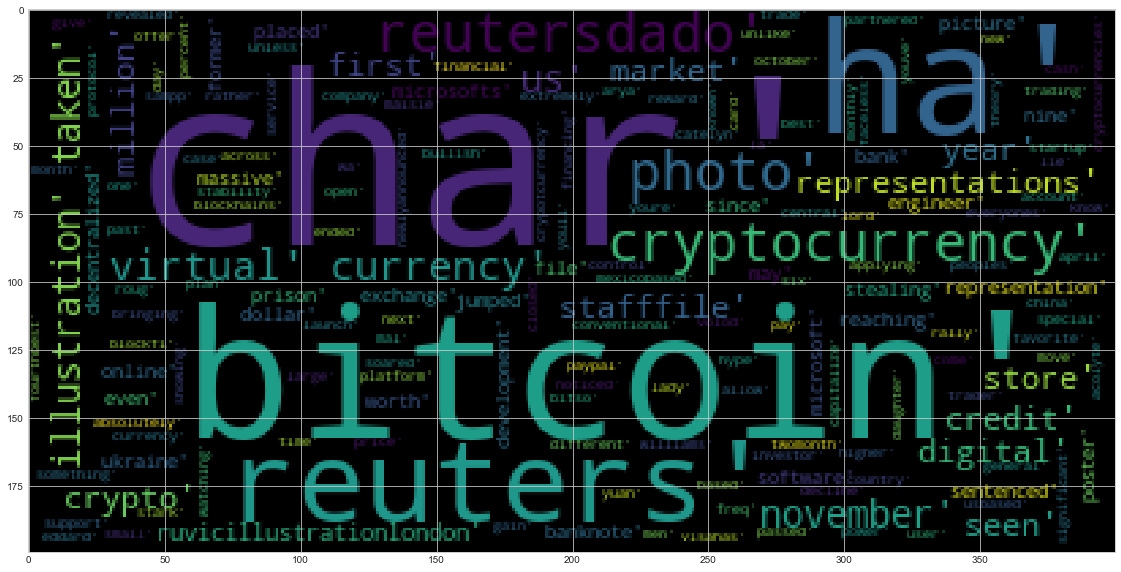

In [31]:
# Generate the Bitcoin word cloud
wc_bitcoin = WordCloud().generate(str(big_bitcoin_list))
plt.imshow(wc_bitcoin)

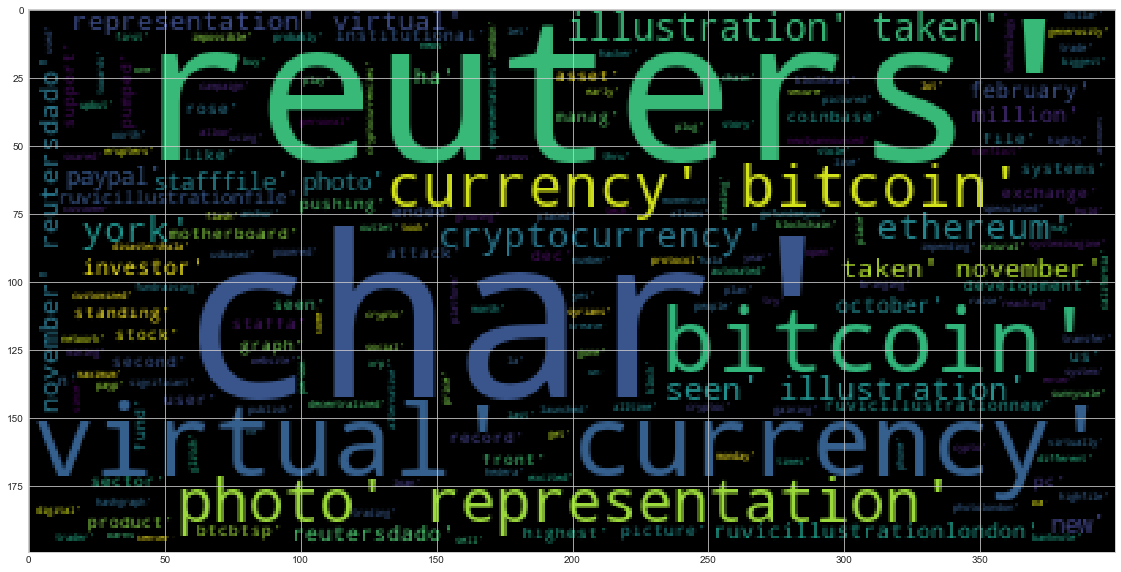

In [32]:
# Generate the Ethereum word cloud
wc_ethereum = WordCloud().generate(str(big_ethereum_list))
plt.imshow(wc_ethereum)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [33]:
import spacy
from spacy import displacy

In [34]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
big_bitcoin_string=str(big_bitcoin_list)

In [37]:
# Run the NER processor on all of the text
doc_bitcoin = nlp(big_bitcoin_string)

In [38]:
# Add a title to the document and Render the visualization
print("Named Entity Recognition for Bitcoin:  \n \n")
displacy.render(doc_bitcoin, style='ent')

Named Entity Recognition for Bitcoin:  
 



In [39]:
# Render the visualization
# YOUR CODE HERE!

In [46]:
# List all Entities
print([ent.text for ent in doc_bitcoin.ents])

['microsoft', 'blockfi', 'first', 'first', 'first', 'china', "'month'", 'williams', 'arya', 'acolyte', 'microsoft', 'tuesday', "december'", 'chavez', 'november', 'reutersdado', 'reuters', 'reuters', 'reutersdado', 'reuters', 'reuters', 'reutersdado', 'reuters', 'motherboard', 'reutersdado', 'reuters']


---

### Ethereum NER

In [41]:
# Concatenate all of the Ethereum text together
big_ethereum_string=str(big_ethereum_list)

In [42]:
# Run the NER processor on all of the text
doc_ethereum = nlp(big_ethereum_string)

In [43]:
# Add a title to the document and Render the visualization
print("Named Entity Recognition for Ethereum:  \n \n")
displacy.render(doc_ethereum, style='ent')

Named Entity Recognition for Ethereum:  
 



In [44]:
# Render the visualization
# YOUR CODE HERE!

In [47]:
# List all Entities
print([ent.text for ent in doc_ethereum.ents])

['first', 'london', 'reuters', "'york'", 'reuters', 'second', 'second', "'month'", 'reutersdado', "'york'", 'reuters', 'reuters', 'november', 'reutersdado', "'york'", 'reuters', 'reuters', 'november', 'reutersdado', 'reuters', 'reuters', 'reutersdado', 'reuters', 'hedera', 'syrians', 'systemimagine', 'california']


---